In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [3]:
ruta = "C:\\Users\\dario\\OneDrive\\Escritorio\\Unab\\Inferencia y Patrones\\TP1\\winequality-red.csv"
vinos = pd.read_csv(ruta, sep = ';')
vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
X = vinos[["volatile acidity", "chlorides",
                          "free sulfur dioxide", "total sulfur dioxide",
                          "pH", "sulphates", "alcohol"]]
X.head()

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.70,0.076,11.0,34.0,3.51,0.56,9.4
1,0.88,0.098,25.0,67.0,3.20,0.68,9.8
2,0.76,0.092,15.0,54.0,3.26,0.65,9.8
3,0.28,0.075,17.0,60.0,3.16,0.58,9.8
4,0.70,0.076,11.0,34.0,3.51,0.56,9.4


In [12]:
y = vinos[["quality"]]
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


Definimos modelos de clasiicación a evaluar

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [20]:
parametros_grid = {
       "knn__n_neighbors": list(range(1, 31)),
        "knn__metric": ["euclidean", "manhattan"]
        }


In [21]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

In [23]:
best_knn = GridSearchCV(pipe, parametros_grid, cv = 5, scoring= "accuracy")
best_knn.fit(X_train,y_train)

C:\Users\dario\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dario\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dario\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dario\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [24]:

y_pred = best_knn.predict(X_test)
print("Accuracy obtenido: ", accuracy_score(y_test, y_pred))
print("**********")
print(classification_report(y_test, y_pred))

Accuracy obtenido:  0.59375
**********
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.78      0.71       130
           6       0.56      0.57      0.57       132
           7       0.43      0.31      0.36        42
           8       0.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.27      0.28      0.27       320
weighted avg       0.55      0.59      0.57       320



C:\Users\dario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
best_knn.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 20}

In [27]:
resultados = pd.DataFrame(best_knn.cv_results_)

resultados_filtrados = resultados[["param_knn__n_neighbors", "param_knn__metric", "mean_test_score"]]

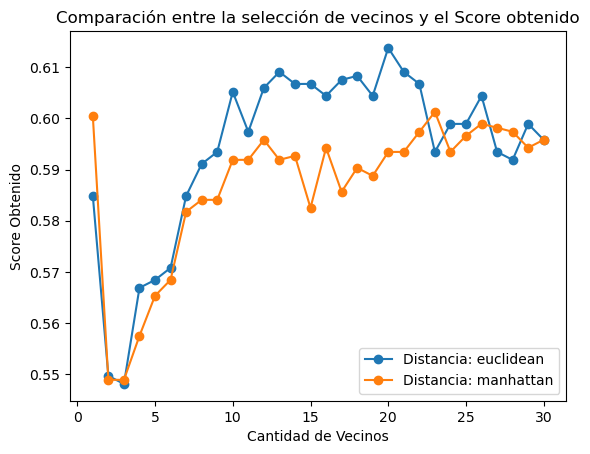

In [44]:
for metrica in resultados_filtrados["param_knn__metric"].unique():
    data_final = resultados_filtrados[resultados_filtrados["param_knn__metric"] == metrica]
    plt.plot(data_final["param_knn__n_neighbors"], data_final["mean_test_score"], label=f"Distancia: {metrica}", marker='o')
    plt.xlabel("Cantidad de Vecinos")
    plt.ylabel("Score Obtenido")
    plt.legend()
    plt.title("Comparación entre la selección de vecinos y el Score obtenido")

In [34]:
parametros_grid1 = {
       "n_neighbors": list(range(1, 31)),
        "metric": ["euclidean", "manhattan"]
        }

In [39]:
best_knn1 = GridSearchCV(KNeighborsClassifier(), parametros_grid1, cv = 5, scoring= "accuracy")
best_knn1.fit(X_train,y_train)
y_pred = best_knn1.predict(X_test)
print("Accuracy obtenido: ", accuracy_score(y_test, y_pred))
print("**********")
print(classification_report(y_test, y_pred))


C:\Users\dario\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dario\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dario\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dario\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Accuracy obtenido:  0.5625
**********
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.14      0.10      0.12        10
           5       0.64      0.64      0.64       130
           6       0.58      0.55      0.57       132
           7       0.43      0.55      0.48        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.30      0.31      0.30       320
weighted avg       0.56      0.56      0.56       320



In [41]:
resultados1 = pd.DataFrame(best_knn1.cv_results_)
best_knn1.best_params_


{'metric': 'euclidean', 'n_neighbors': 1}

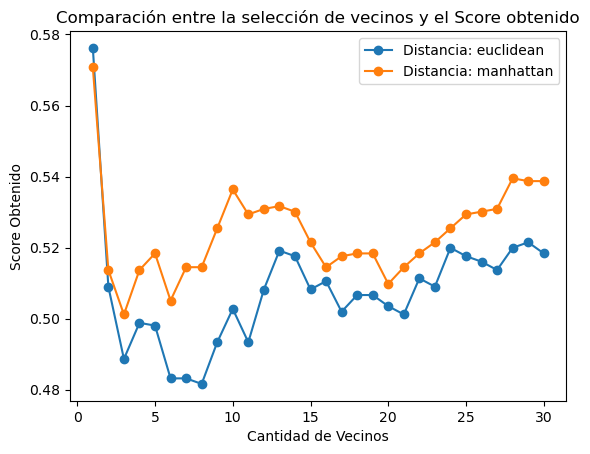

In [43]:
resultados_filtrados1 = resultados1[["param_n_neighbors", "param_metric", "mean_test_score"]]
for metrica in resultados_filtrados1["param_metric"].unique():
    data_final = resultados_filtrados1[resultados_filtrados1["param_metric"] == metrica]
    plt.plot(data_final["param_n_neighbors"], data_final["mean_test_score"], label=f"Distancia: {metrica}", marker='o')
    plt.xlabel("Cantidad de Vecinos")
    plt.ylabel("Score Obtenido")
    plt.legend()
    plt.title("Comparación entre la selección de vecinos y el Score obtenido")